In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
data = pd.read_csv("uber-data.csv")
data

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512
...,...,...,...,...
1028131,9/30/2014 22:57:00,40.7668,-73.9845,B02764
1028132,9/30/2014 22:57:00,40.6911,-74.1773,B02764
1028133,9/30/2014 22:58:00,40.8519,-73.9319,B02764
1028134,9/30/2014 22:58:00,40.7081,-74.0066,B02764


In [3]:
data = data[["Lat","Lon"]]
data

,Lat,Lon
0,40.2201,-74.0021
1,40.7500,-74.0027
2,40.7559,-73.9864
3,40.7450,-73.9889
4,40.8145,-73.9444
...,...,...
1028131,40.7668,-73.9845
1028132,40.6911,-74.1773
1028133,40.8519,-73.9319
1028134,40.7081,-74.0066


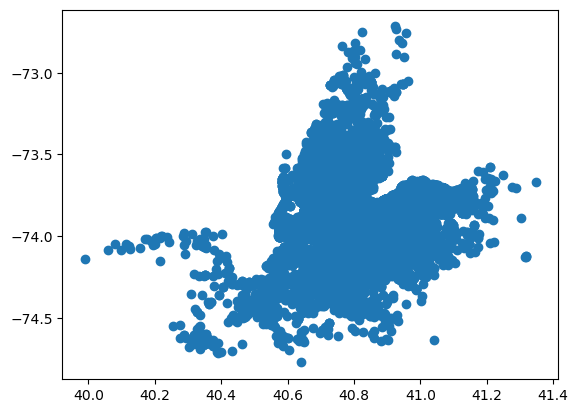

In [4]:
plt.scatter(data[("Lat")],data[("Lon")])

In [5]:
data.describe()

,Lat,Lon
count,1.028136e+06,1.028136e+06
mean,4.073922e+01,-7.397182e+01
std,4.082861e-02,5.831413e-02
min,3.998970e+01,-7.477360e+01
25%,4.072040e+01,-7.399620e+01
50%,4.074180e+01,-7.398310e+01
75%,4.076120e+01,-7.396280e+01
max,4.134760e+01,-7.271630e+01


### Handling Missing Value

In [6]:
data.isna().sum()

Lat    0
Lon    0
dtype: int64

## Handling outlier using IQR Trim

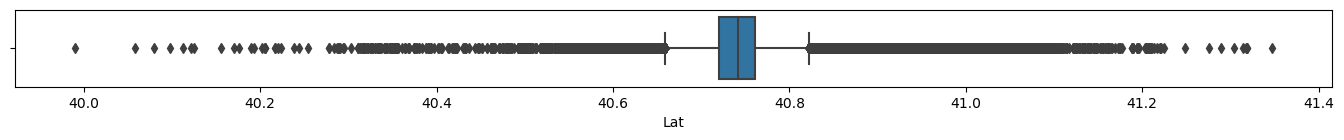

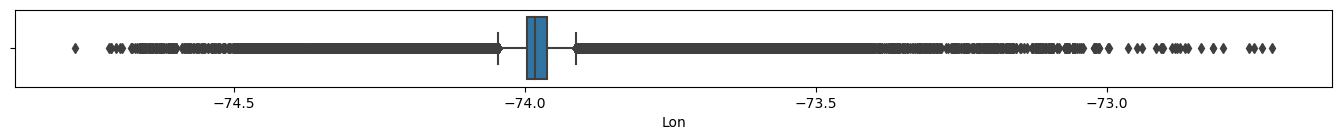

In [7]:
for i in data [["Lat","Lon"]]:
    plt.figure(figsize=(17,1))
    sns.boxplot(data = data [["Lat","Lon"]], x=i)

array([[<Axes: title={'center': 'Lat'}>, <Axes: title={'center': 'Lon'}>]],
      dtype=object)

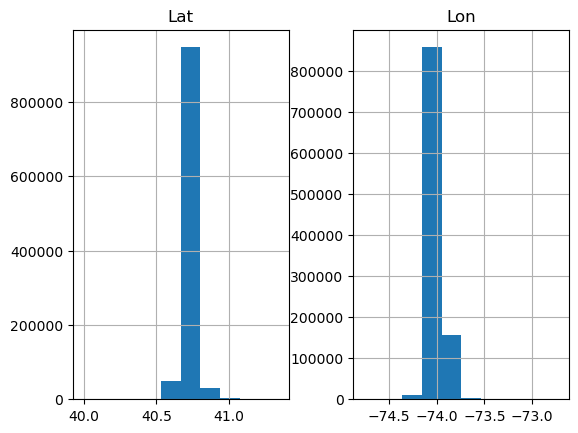

In [8]:
data.hist()

In [9]:
def handle_outlier (column, data, method):

    for i in column:
        q1=data[i].quantile(0.25)
        q3=data[i].quantile(0.75)
        iqr = q3-q1
        upper_bound = q3 + (1.5*iqr)
        lower_bound = q1 - (1.5*iqr)
        outlier = data [(data[i] < lower_bound) | (data[i]>upper_bound)] 
        print("jumlah outlier column",i,":",len(outlier),"dengan persentasi:", (len(outlier)/len(data[i])*100),"%")
        if method == "remove" :
            data = data[(data[i]>=lower_bound) & (data[i]<=upper_bound)]
        elif method =="trim":
            data[i] = data[i].clip(lower =lower_bound, upper = upper_bound)
    return(data)       



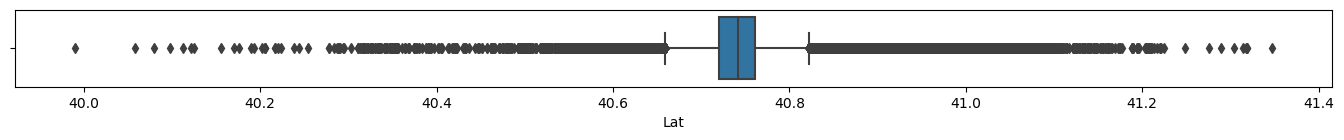

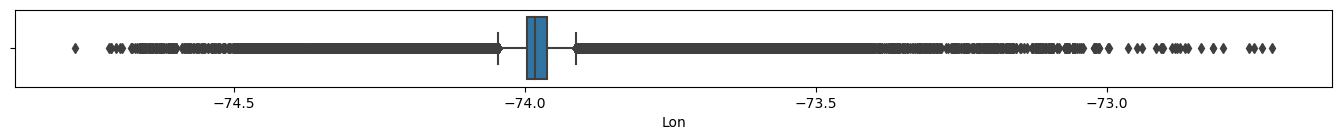

In [10]:
for i in data [["Lat","Lon"]]:
    plt.figure(figsize=(17,1))
    sns.boxplot(data = data [["Lat","Lon"]], x=i)

array([[<Axes: title={'center': 'Lat'}>, <Axes: title={'center': 'Lon'}>]],
      dtype=object)

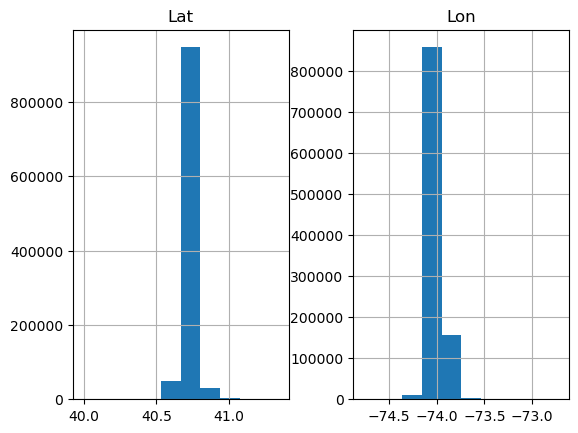

In [11]:
data.hist()

## Machine Learning

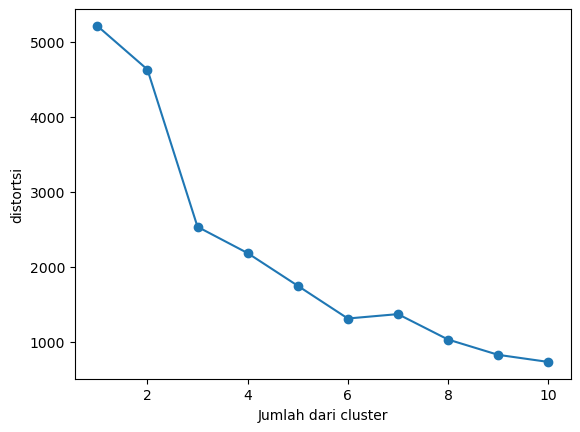

In [15]:
#elbow menthod, output siku tidak jelas, pakai silhouette score

distortion = []
for i in range (1,11):
    cluster = KMeans(n_clusters = i)
    cluster.fit(data)
    distortion.append(cluster.inertia_)

plt.plot(range(1,11),distortion,marker="o")
plt.xlabel("Jumlah dari cluster")
plt.ylabel("distortsi")
plt.show()

In [18]:
#silhouette score, dg sample 1% data , better at least minimal 30% data 
sample_data = data.sample(n=10000)
for i in range (2,11):
    cluster = KMeans(n_clusters =i)
    prediction = cluster.fit_predict(sample_data)
    center = cluster.cluster_centers_
    score = silhouette_score(sample_data,prediction,metric="euclidean")
    print(f"For cluster {i},silhouette_score is {score}")
    

For cluster 2,silhouette_score is 0.6981326999296603
For cluster 3,silhouette_score is 0.7075851628482598
For cluster 4,silhouette_score is 0.36669984398967437
For cluster 5,silhouette_score is 0.3738530546661932
For cluster 6,silhouette_score is 0.42504511137327583
For cluster 7,silhouette_score is 0.44476751039834744
For cluster 8,silhouette_score is 0.4494894654379628
For cluster 9,silhouette_score is 0.4141093265308566
For cluster 10,silhouette_score is 0.4336805152799159


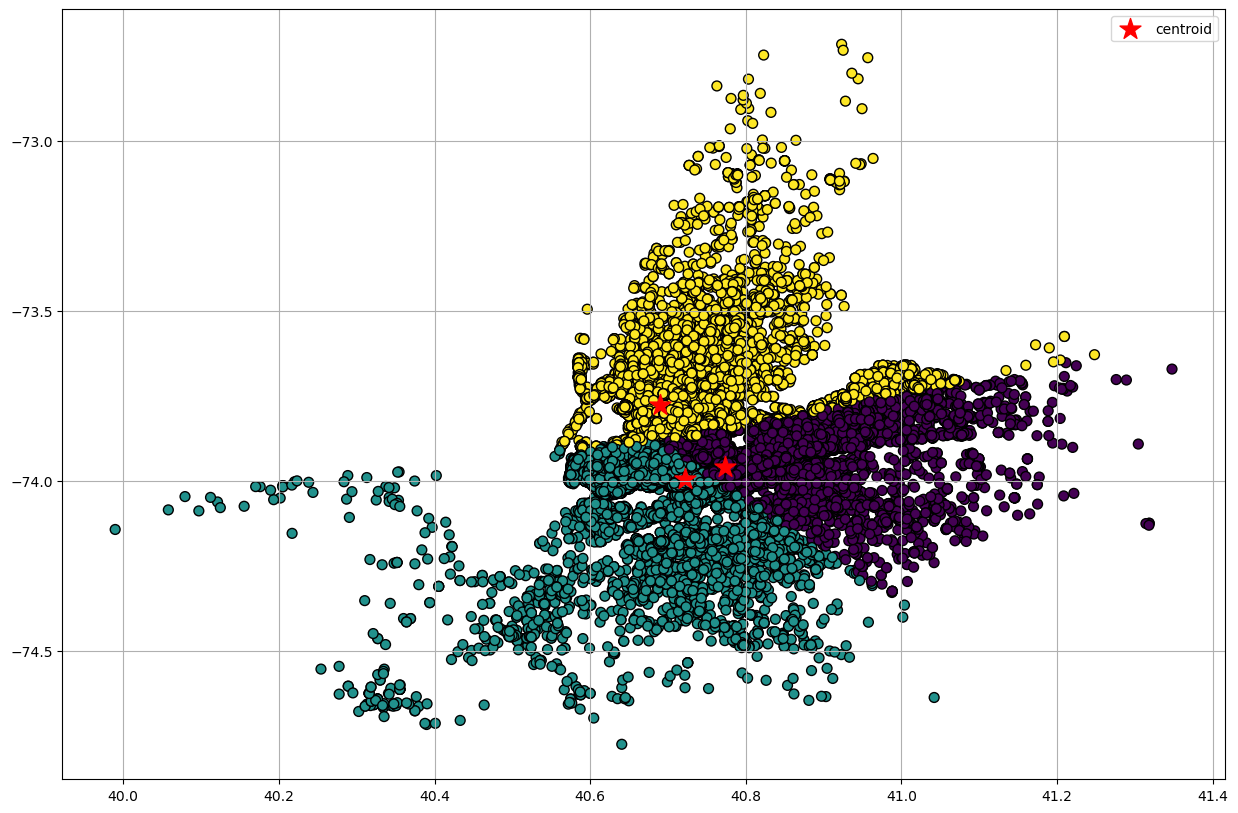

In [22]:
num_clusters = 3
plt.figure(figsize = (15,10))

cluster = KMeans(n_clusters = 3)
y = cluster.fit_predict(data)
plt.scatter(data.iloc[:,0],data.iloc[:,1],c = y, s =50, cmap = "viridis", edgecolor ="black")
plt.scatter(cluster.cluster_centers_[:,0],cluster.cluster_centers_[:,1], c = "red", s = 250, marker = "*",label = "centroid")
plt.legend(scatterpoints = 1)
plt.grid()
plt.show()

In [24]:
df_uber_date_time = pd.read_csv('uber-data.csv')
df_uber_date_time['Date/Time'] = pd.to_datetime((df_uber_date_time.iloc[:,0]), format ='%m/%d/%Y %H:%M:%S')
df_uber_date_time['hour'] = df_uber_date_time['Date/Time'].dt.hour
df_uber_date_time

,Date/Time,Lat,Lon,Base,hour
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,0
...,...,...,...,...,...
1028131,2014-09-30 22:57:00,40.7668,-73.9845,B02764,22
1028132,2014-09-30 22:57:00,40.6911,-74.1773,B02764,22
1028133,2014-09-30 22:58:00,40.8519,-73.9319,B02764,22
1028134,2014-09-30 22:58:00,40.7081,-74.0066,B02764,22


In [26]:
df_uber_date_time_10to2 = df_uber_date_time [(df_uber_date_time['hour']>=10) & (df_uber_date_time['hour']<= 14)]
df_uber_date_time_10to2 

,Date/Time,Lat,Lon,Base,hour
107,2014-09-01 10:02:00,41.0160,-73.6678,B02512,10
108,2014-09-01 10:02:00,40.7619,-73.9685,B02512,10
109,2014-09-01 10:02:00,40.7382,-74.0073,B02512,10
110,2014-09-01 10:08:00,40.7555,-73.9360,B02512,10
111,2014-09-01 10:09:00,40.6601,-74.1181,B02512,10
...,...,...,...,...,...
1024059,2014-09-30 14:59:00,40.7699,-73.9171,B02764,14
1024060,2014-09-30 14:59:00,40.7952,-73.9751,B02764,14
1024061,2014-09-30 14:59:00,40.7422,-74.0042,B02764,14
1024062,2014-09-30 14:59:00,40.7722,-73.9650,B02764,14


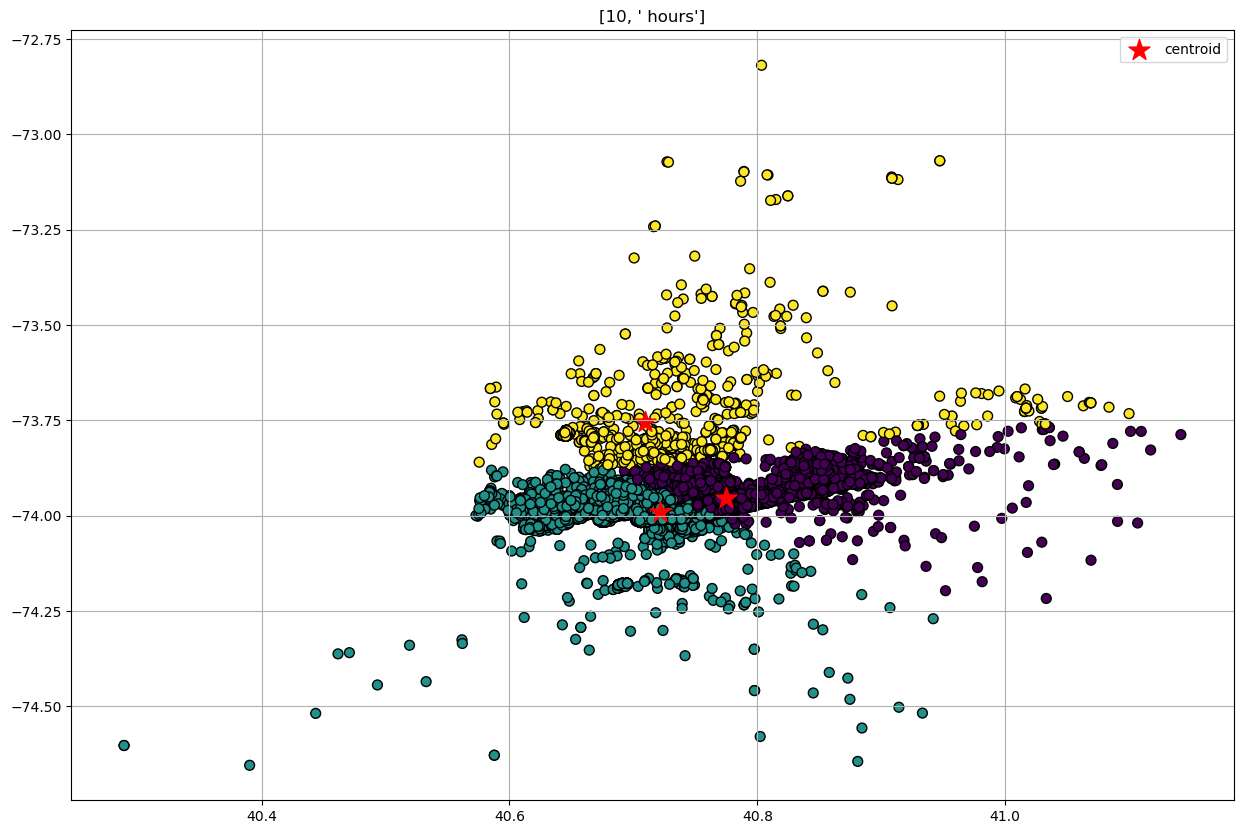

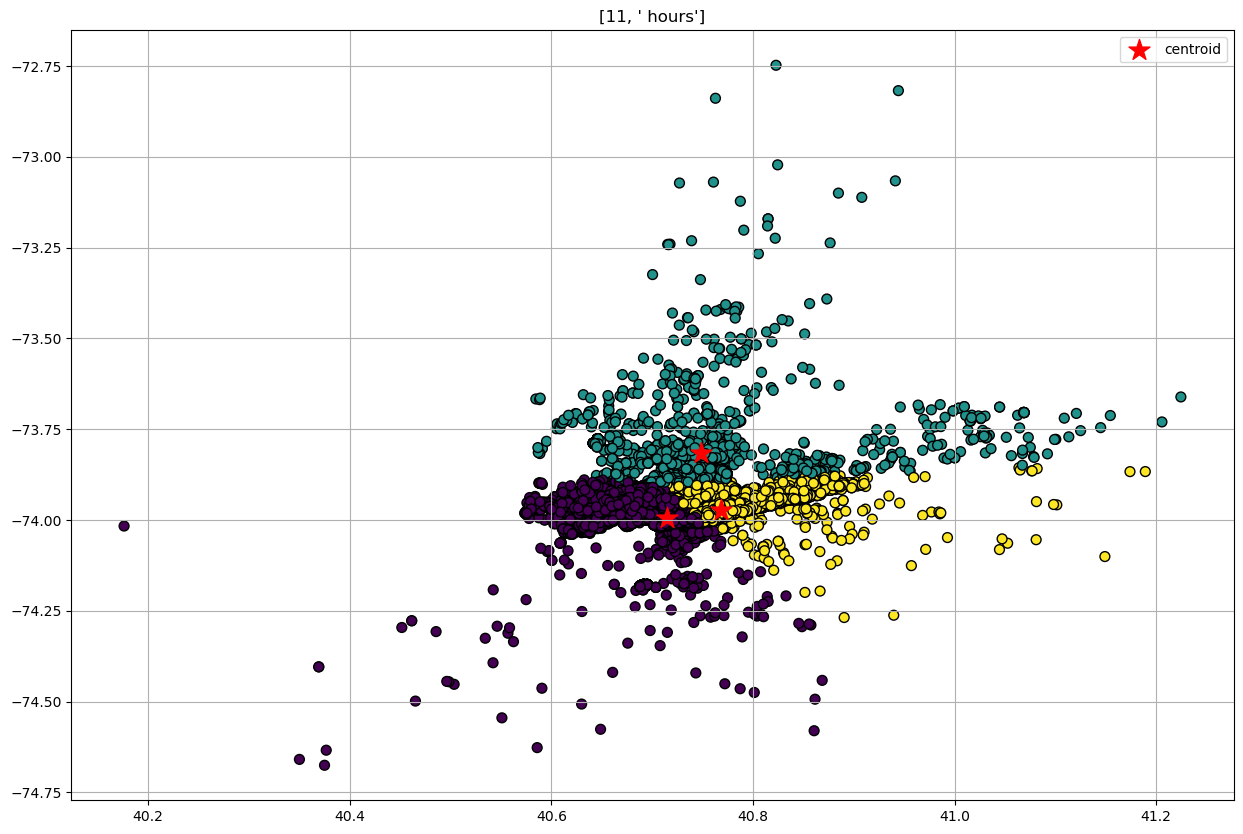

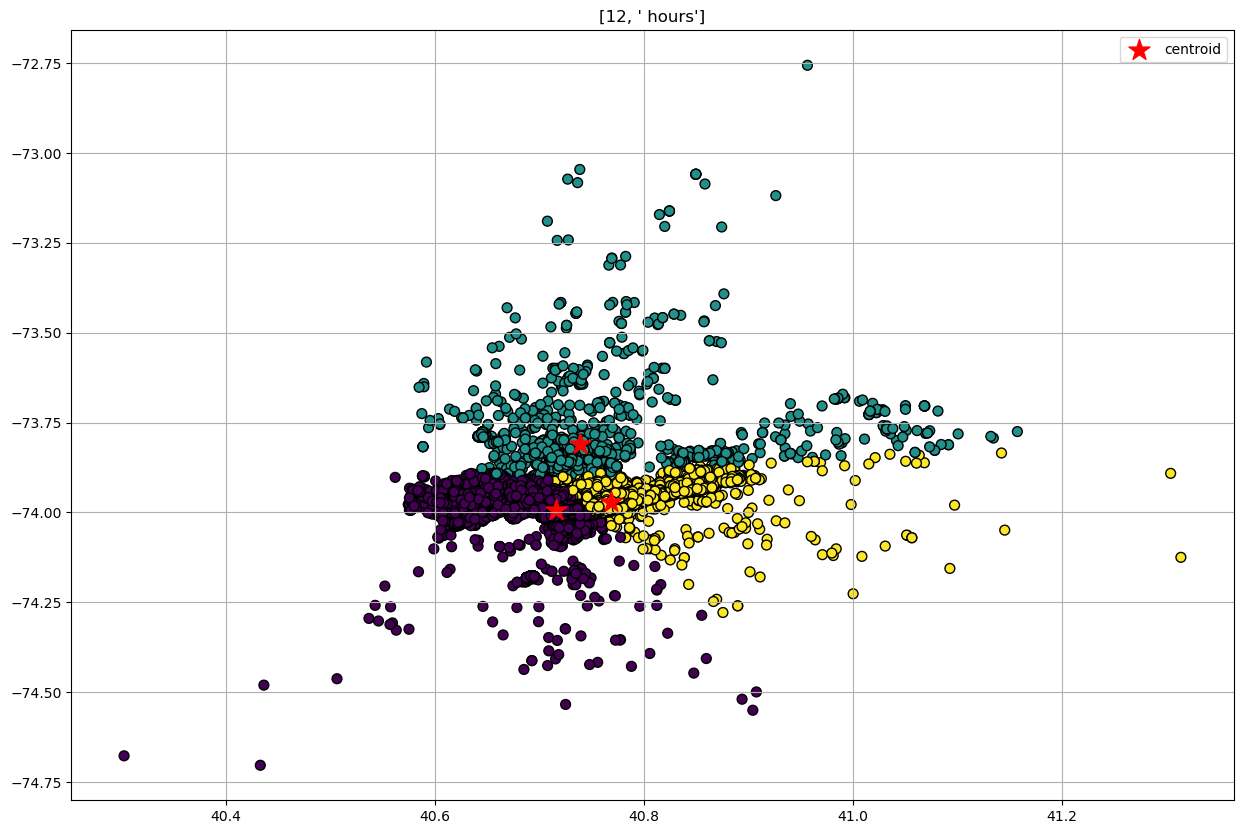

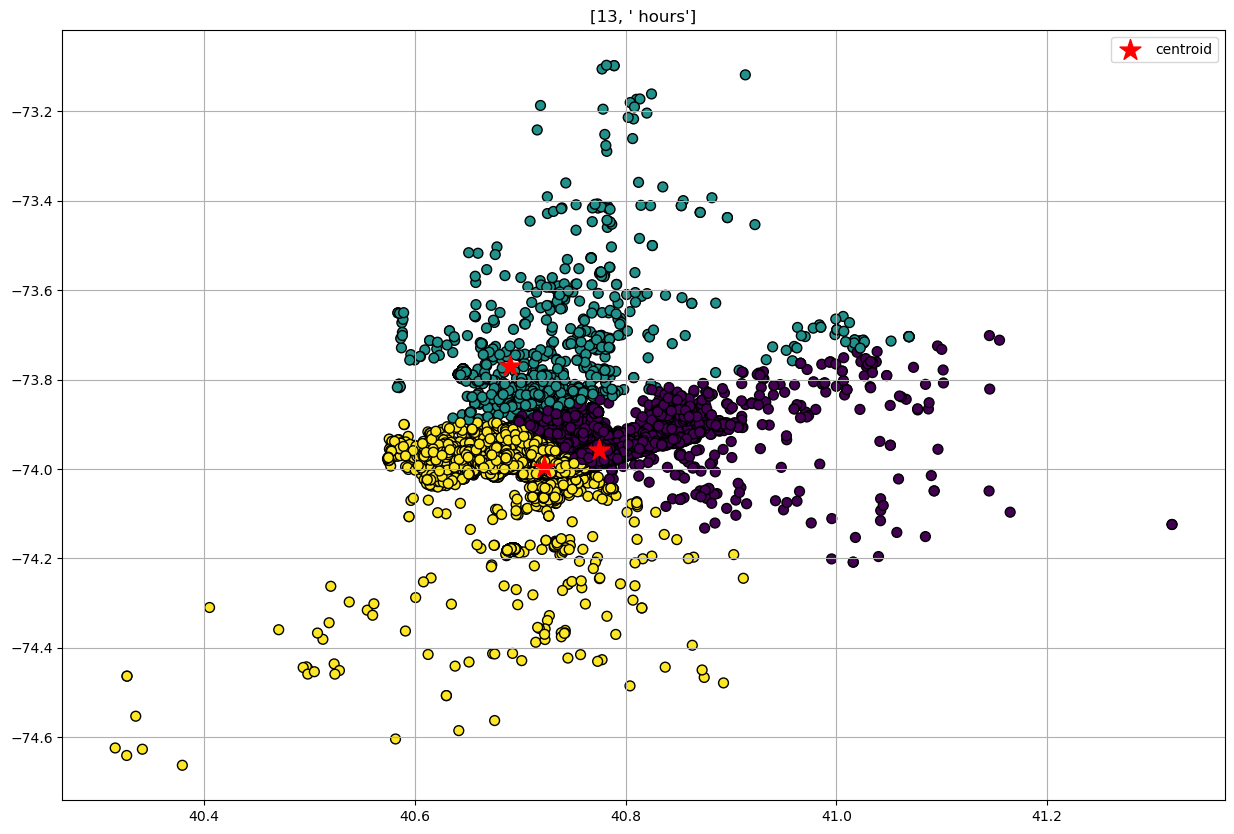

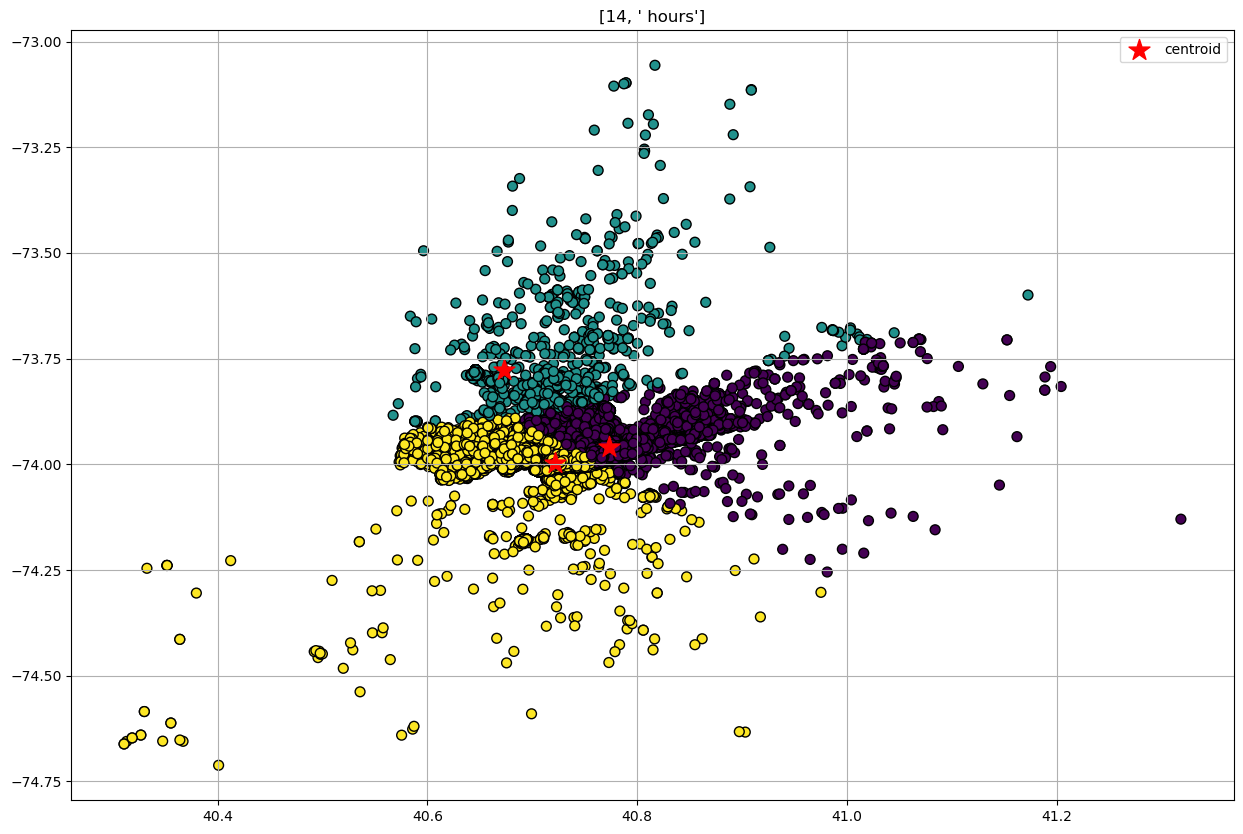

In [27]:
result_centroid = []
for i in range (10,15):
    num_clusters = 3
    plt.figure(figsize = (15,10))
    cluster = KMeans(n_clusters = 3)
    data = df_uber_date_time_10to2.loc[df_uber_date_time_10to2 ["hour"]== i, ["Lat","Lon"]]
    y = cluster.fit_predict(data)
    plt.scatter(data.iloc[:,0],data.iloc[:,1],c = y, s =50, cmap = "viridis", edgecolor ="black")
    plt.scatter(cluster.cluster_centers_[:,0],cluster.cluster_centers_[:,1], c = "red", s = 250, marker = "*",label = "centroid")
    result_centroid.append((cluster.cluster_centers_[:,0],cluster.cluster_centers_[:,1]))
    plt.title([i," hours"])
    plt.legend(scatterpoints = 1)
    plt.grid()
    plt.show()

In [28]:
result_centroid

[(array([40.77505494, 40.72170485, 40.70954041]),
  array([-73.95498793, -73.99140183, -73.75543288])),
 (array([40.71499565, 40.74832416, 40.76853867]),
  array([-73.99390449, -73.81563386, -73.97103544])),
 (array([40.71643295, 40.73903447, 40.76904747]),
  array([-73.99351802, -73.80986341, -73.97083857])),
 (array([40.77502205, 40.68996464, 40.7223846 ]),
  array([-73.95696725, -73.76936067, -73.99466041])),
 (array([40.77295251, 40.67338107, 40.7218362 ]),
  array([-73.95948149, -73.77657965, -73.99655062]))]